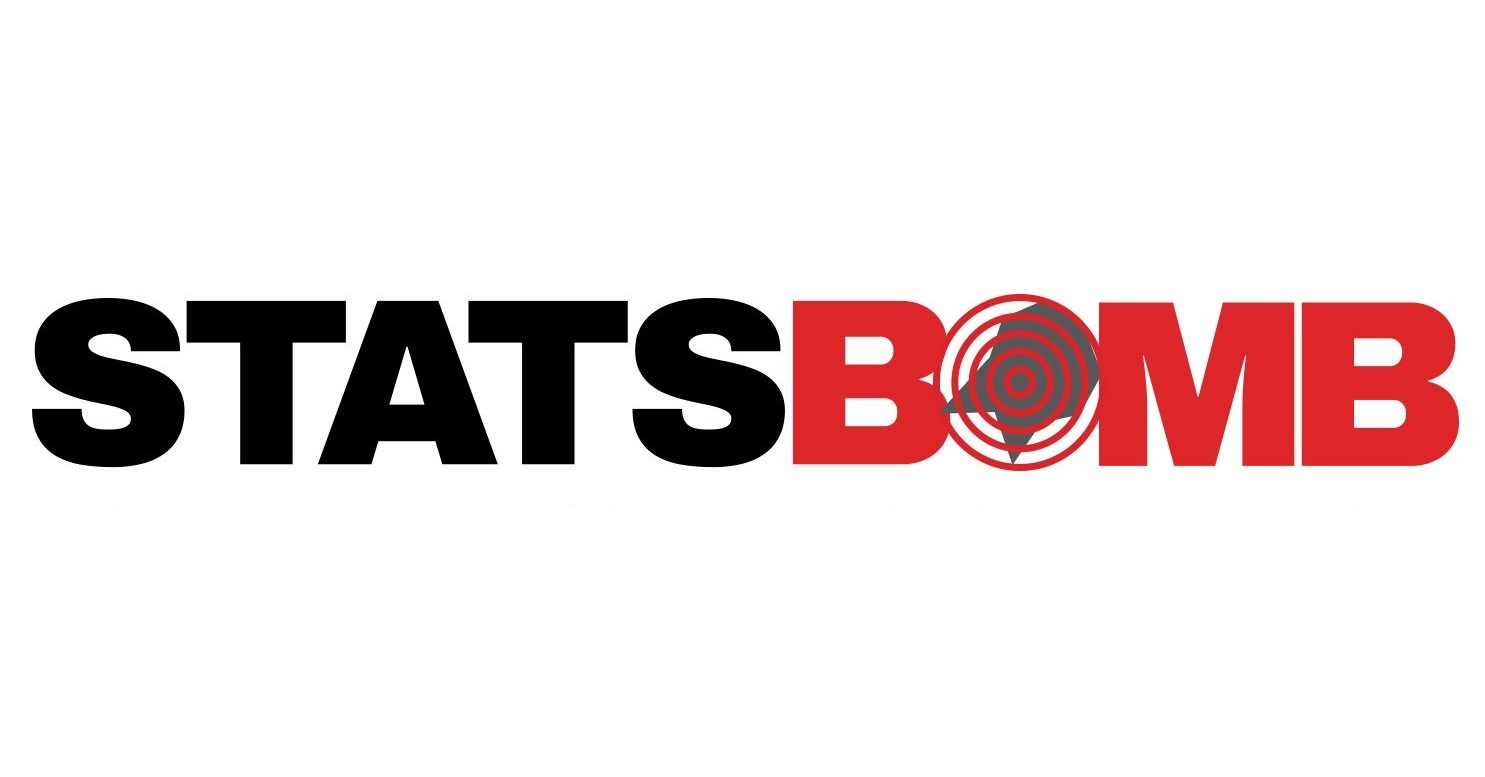

In [ ]:
! pip install mplsoccer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 kB 1.5 MB/s eta 0:00:00


In [ ]:
! pip install mplsoccer
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer import Pitch, VerticalPitch

In [ ]:
class StatsBomb:

  def __init__(self, ids):
    self.ids = ids

  def get_competitions(self):
    comp = requests.get('https://raw.githubusercontent.com/statsbomb/open-data/master/data/competitions.json').json()
    comptition = pd.DataFrame({
        'competition_id': [comp[i]['competition_id'] for i in range(len(comp))],
        'competition_name': [comp[i]['competition_name'] for i in range(len(comp))],
        'season_name': [comp[i]['season_name'] for i in range(len(comp))],
        'season_id': [comp[i]['season_id'] for i in range(len(comp))]
    })
    return comptition

  def get_matches(self):   # ids (43, 3) for 2018 FIFA WORLD CUP
    matches = requests.get('https://raw.githubusercontent.com/statsbomb/open-data/master/data/matches/'+ str(self.ids[0])+ '/' + str(self.ids[1]) + '.json').json()
    matches = pd.DataFrame({
        'match_id':[matches[i]['match_id'] for i in range(len(matches))],
        'match_date':[matches[i]['match_date'] for i in range(len(matches))],
        'kick_off': [matches[i]['kick_off'] for i in range(len(matches))],
        'stage': [matches[i]['competition_stage']['name'] for i in range(len(matches))],
        'stadium': [matches[i]['stadium']['name'] for i in range(len(matches))],
        'referee':[matches[i]['referee']['name'] for i in range(len(matches))],
        'home_team': [matches[i]['home_team']['home_team_name'] for i in range(len(matches))],
        'away_team': [matches[i]['away_team']['away_team_name'] for i in range(len(matches))],
        'home_manager': [matches[i]['home_team']['managers'][0]['name'] for i in range(len(matches))],
        'away_manager': [matches[i]['away_team']['managers'][0]['name'] for i in range(len(matches))],
        'home_score': [matches[i]['home_score'] for i in range(len(matches))],
        'away_score': [matches[i]['away_score'] for i in range(len(matches))]
    })
    return matches

  def __get_event_detail(self, event):

    if event['type']['name'] == '50/50':  # example not checked  # checked
      return {
          'player': event['player']['name'],
          'location': event['location'],
          'outcome': event['50_50']['outcome']['name']}

    elif event['type']['name'] == 'Bad Behaviour':  # example not checked  # checked
      return {
          'player': event['player']['name'],
          'card': event['bad_behaviour']['card']['name'],
          'location': 'None'
      }

    elif event['type']['name'] == 'Ball Receipt*':   # example iran por checked   # checked
      return {
          'player': event['player']['name'],
          'location': event['location']
      }

    elif event['type']['name'] == 'Ball Recovery':   # example checked argentina croatia (7545)  # checked

      if 'ball_recovery' in event.keys():
        if 'offensive' in event['ball_recovery'].keys():
          status = 'offensive'
        elif 'recovery_failure' in event['ball_recovery'].keys():
          status = 'recovery_failure'
      else:
        status = 'succeed'

      return {
          'player': event['player']['name'],
          'location': event['location'],
          'outcome': status   # offensive, failure, succeed
      }

    elif event['type']['name'] == 'Block':  # checked
      return {
          'player': event['player']['name'],
          'location': event['location'],
          'status': 'None'
      }

    elif event['type']['name'] == 'Carry':   # checked
      return {
          'player': event['player']['name'],
          'location': event['location'],
          'end_location': event['carry']['end_location'],
          'duration': event['duration']
      }

    elif event['type']['name'] == 'Clearance':   # checked
      return {
          'player': event['player']['name'],
          'location': event['location']
      }

    elif event['type']['name'] == 'Dribble':  # features are simplified  # checked
      return {
          'player': event['player']['name'],
          'location': event['location'],
          'status': event['dribble']['outcome']['name']
      }

    elif event['type']['name'] == 'Dribbled Past': # features are simplified  # checked
      return {
          'player': event['player']['name'],
          'location': event['location']
      }

    elif event['type']['name'] == 'Duel': # features are simplified # checked
      if 'outcome' in event['duel'].keys():
        tk_detail = event['duel']['outcome']['name']
      else:
        tk_detail = 'None'
      return {
          'player': event['player']['name'],
          'location': event['location'],
          'status': event['duel']['type']['name'],
          'tackle_details': tk_detail
      }

    elif event['type']['name'] == 'Foul Committed':   # simplified features  # checked
      if 'foul_committed' in event.keys():
        if 'card' in event['foul_committed'].keys():
          card = event['foul_committed']['card']['name']
        else:
          card = 'None'
      else:
        card = 'None'

      return {
          'player': event['player']['name'],
          'location': event['location'],
          'card': card
      }

    elif event['type']['name'] == 'Foul Won':  # checked
      return {
          'player': event['player']['name'],
          'location': event['location']
      }

    elif event['type']['name'] == 'Goalkeeper':  # lot of features
      return 'Not completed'

    elif event['type']['name'] == 'Half End':  # checked
      return 'None'

    elif event['type']['name'] == 'Half Start':  # checked
      return 'None'

    elif event['type']['name'] == 'Interception':  # checked
      return {
          'player': event['player']['name'],
          'status': event['interception']['outcome']['name']
      }

    elif event['type']['name'] == 'Injury Stoppage':  # checked
      return 'None'

    elif event['type']['name'] == 'Miscontrol': # features are simplified  # checked
      return {
          'player': event['player']['name'],
          'location': event['location']
          # aerial_won: ???
      }

    elif event['type']['name'] == 'Pass': # lot of features
      if 'outcome' in event['pass'].keys():
        outcome = 'incomplete'
      else:
        outcome = 'complete'

      if 'recipient' in event['pass'].keys():
        recipient = event['pass']['recipient']['name']
      else:
        recipient = 'None'

      if 'body_part' in event['pass'].keys():
        body_part = event['pass']['body_part']['name']
      else:
        body_part = 'None'

      return {
          'player': event['player']['name'],
          'recipient': recipient,
          'location': event['location'],
          'end_location': event['pass']['end_location'],
          'height': event['pass']['height']['name'],
          'body_part': body_part,
          'outcome': outcome
      }

    elif event['type']['name'] == 'Player Off':
      return 'Not Completed'

    elif event['type']['name'] == 'Pressure':  # checked
      if 'duration' in event.keys():
        duration = event['duration']
      else:
        duration = 'None'
      return {
          'player':  event['player']['name'],
          'location': event['location'],
          'duration': duration
      }

    elif event['type']['name'] == 'Shot': # checked # features are simplified
      return {
          'player': event['player']['name'],
          'location': event['location'],
          'body_part': event['shot']['body_part']['name'] ,
          'outcome': event['shot']['outcome']['name'],
          'xg': event['shot']['statsbomb_xg'],
      }

    elif event['type']['name'] == 'Substitution': # checked
      if 'outcome' in event['substitution'].keys():
        reason = event['substitution']['outcome']['name']
      else:
        reason = 'None'
      return {
          'player':  event['player']['name'],
          'replacement':  event['substitution']['replacement']['name'],
          'reason': reason
      }

    elif event['type']['name'] == 'Shield':  # checked
      return {
          'player': event['player']['name'],
          'location': event['location']
      }

    elif event['type']['name'] == 'Starting XI':   # checked
      return {
          'formation': event['tactics']['formation']
          #'lineup': event['tactics']['lineup']
      }

    elif event['type']['name'] == 'Tactical Shift':   # checked
      return {
          'formation': event['tactics']['formation']
          #'lineup': event['tactics']['lineup']
      }

    elif event['type']['name'] == 'Error':   # checked
      return {
          'player': event['player']['name'],
          'location': event['location']
      }

    elif event['type']['name'] == 'Referee Ball-Drop':   # checked
      return 'None'

    elif event['type']['name'] == 'Offside':   # checked
      return {
          'player': event['player']['name'],
          'location': event['location']
      }

    elif event['type']['name'] == 'Dispossessed':  # ؟؟
      return {
          'player': event['player']['name'],
          'location': event['location']
      }

    else:
      return 'Not Completed'


  def __get_events(self, match_id):
    events = requests.get('https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/'+ str(match_id) +'.json').json()
    return pd.DataFrame({
              'match_id': [match_id for i in range(len(events))],
              #'event_id': [events[i]['id'] for i in range(len(events))],
              'event_time': [(events[i]['minute'], events[i]['second']) for i in range(len(events))],
              'event_period': [events[i]['period'] for i in range(len(events))],
              'play_pattern': [events[i]['play_pattern']['name'] for i in range(len(events))],
              #'possession_team': [events[i]['possession_team']['name'] for i in range(len(events))],
              'team': [events[i]['team']['name'] for i in range(len(events))],
              'event_name': [events[i]['type']['name'] for i in range(len(events))],
              'event_details': [self.__get_event_detail(events[i]) for i in range(len(events))]
              })


  def get_events_totall(self):
    match_ids = list(self.get_matches()['match_id'])
    events_df = self.__get_events(match_ids[0])
    for id in match_ids[1:]:
      added_df = self.__get_events(id)
      events_df = pd.concat([events_df, added_df])
    return events_df

  def filter_event_data(self):
     events_df = self.get_events_totall()
     events_df = events_df[events_df.event_name != 'Ball Receipt*']
     events_df.index =  list(range(len(events_df)))
     condition1 = (events_df['event_name'] != 'Camera On') & (events_df['event_name'] != 'Camera off') & (events_df['event_name'] != 'Clearance') & (events_df['event_name'] != 'Ball Recovery') & (events_df['event_name'] != 'Carry')
     condition2 = (events_df['event_name'] != 'Player On') & (events_df['event_name'] != 'Player Off') & (events_df['event_name'] != 'Shield') & (events_df['event_name'] != 'Block') & (events_df['event_name'] != 'Own Goal Against')
     condition3 = (events_df['event_name'] != 'Foul Won') & (events_df['event_name'] != '50/50') & (events_df['event_name'] != 'Duel') & (events_df['event_name'] != 'Interception') & (events_df['event_name'] != 'Bad Behaviour')
     condition4 = (events_df['event_name'] != 'Injury Stoppage')  & (events_df['event_name'] != 'Goal Keeper') & (events_df['event_name'] != 'Referee Ball-Drop') & (events_df['event_name'] != 'Dribble')
     events_df = events_df[condition1 & condition2 & condition3 & condition4]
     events_df.index = list(range(len(events_df)))
     return events_df

stats_bomb = StatsBomb((43, 3))
events = stats_bomb.filter_event_data()
matches = stats_bomb.get_matches()
compet = stats_bomb.get_competitions()

In [ ]:
compet

,competition_id,competition_name,season_name,season_id
0,9,1. Bundesliga,2015/2016,27
1,16,Champions League,2018/2019,4
2,16,Champions League,2017/2018,1
3,16,Champions League,2016/2017,2
4,16,Champions League,2015/2016,27
...,...,...,...,...
65,55,UEFA Euro,2020,43
66,35,UEFA Europa League,1988/1989,75
67,53,UEFA Women's Euro,2022,106
68,72,Women's World Cup,2023,107


In [ ]:
/content/drive/MyDrive/Soccer Analytics/2018_FIFA_WORLD_CUP_EVENTS.csv

In [ ]:
events.to_pickle('2018_FIFA_WORLD_CUP_EVENTS.pkl')
matches.to_pickle('2018_FIFA_WORLD_CUP_MATCHES.pkl')
! mv '2018_FIFA_WORLD_CUP_EVENTS.pkl' '/content/drive/MyDrive/Soccer Analytics'
! mv '2018_FIFA_WORLD_CUP_MATCHES.pkl' '/content/drive/MyDrive/Soccer Analytics'

In [ ]:
e = pd.read_pickle('2018_FIFA_WORLD_CUP_EVENTS.pkl')
type(e.iloc[0,6])

dict